¡Hola, Pilar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>




<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Pilar! Has hecho un excelente trabajo al realizar con el desarrollo del proyecto, realizas un tratamiento inicial a los datos, el filtro de estos y las pruebas indicadas. Solamente te dejo algunos comentarios para terminar de complementar el análisis

Sigue con el excelente trabajo!
</div>

# Prueba A/B- Tienda en línea

## Descripción del proyecto

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

### Descripción técnica

- Nombre de la prueba: `recommender_system_test`
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_card`) y compras (`purchase`). En cada etapa del embudo `product_page → product_card → purchase`, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

### Descripción de los datasets

`ab_project_marketing_events_us.csv`:

- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña

`final_ab_new_users_upd_us.csv`:

- `user_id`
- `first_date`: fecha de inscripción
- `region`
- `device`: dispositivo utilizado para la inscripción

`final_ab_events_upd_us.csv`:

- `user_id`
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

`final_ab_participants_upd_us.csv`:

- `user_id`
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario

## Preprocesamiento

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as st

In [2]:
# Leer documentos
df_calendario = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
df_usuarios = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
df_eventos = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df_participantes = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [3]:
# Explorar df_calendario: info, describe, head
print(df_calendario.info())
print(df_calendario.describe())
print(df_calendario.head)
print('Valores duplicados:', df_calendario.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None
                     name regions    start_dt   finish_dt
count                  14      14          14          14
unique                 14       6          14          14
top     4th of July Promo    APAC  2020-12-25  2020-05-11
freq                    1       4           1           1
<bound method NDFrame.head of                                 name                   regions    start_dt  \
0           Christmas&New Year Promo             EU, N.America  2020-12-25   
1       St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2             St. Patric's Day Promo             EU, N.Ameri

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con el análisis inicial de los datos y con la identificación de registros duplicados. Como aprendiste durante los cursos anteriores, esto es fundamental para disminuir el sesgo de nuestros resultados 

In [4]:
# Normalizar datos
#cambiar dtype start_dt, finish_dt
df_calendario['start_dt'] = pd.to_datetime(df_calendario['start_dt'])
df_calendario['finish_dt'] = pd.to_datetime(df_calendario['finish_dt'])

In [5]:
#Explorar df_usuarios: info, describe, head
print(df_usuarios.info())
print(df_usuarios.describe())
print()
print(df_usuarios.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     08BF96161DC6B7FC  2020-12-21     EU  Android
freq                   1        6077  43396    26159

<bound method NDFrame.head of                 user_id  first_date     region   device
0      D72A72121175D8BE  2020-12-07         EU       PC
1      F1C668619DFE6E65  2020-12-07  N.America  Android
2      2E1BF1D4C37EA01F  2020-12-07         EU       PC
3      50734A22C0C63768  2020-12-07         EU   iPhone
4      E1BDDCE0DAFA2679  2020-1

In [6]:
#Cambiar dtype first_date
df_usuarios['first_date'] = pd.to_datetime(df_usuarios['first_date'])

In [7]:
#Explorar df_eventos: info, describe, head
print(df_eventos.info())
print(df_eventos.describe())
print()
print(df_eventos.head)
print('Valores duplicados:', df_eventos.duplicated().sum())
print()
print(df_eventos['event_name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None
            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000

<bound method NDFrame.head of                  user_id             event_dt event_name  details
0       E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1       7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2       9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3       96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4       1FD7660FDF94CA1F  2020-12-07 10

In [8]:
#Cambiar dtype event_dt
df_eventos['event_dt'] = pd.to_datetime(df_eventos['event_dt'])

In [9]:
#Explorar df_participantes
print(df_participantes.info())
print(df_participantes.describe())
print()
print(df_participantes.head)
print('Valores duplicados:', df_participantes.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     3BDE2B9FBC14F7A4      A  interface_eu_test
freq                   2   8214              10850

<bound method NDFrame.head of                 user_id group                  ab_test
0      D1ABA3E2887B6A73     A  recommender_system_test
1      A7A3664BD6242119     A  recommender_system_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
4      4FF2998A348C484F     A  recommender_system_test
...                 ...   ...               

In [10]:
#Observar cuántos usuarios hay por grupo A/B
print(df_participantes['group'].value_counts())

#observar cuántos usuarios únicos hay por grupo A/B
print(df_participantes.groupby('group')['user_id'].nunique())

A    8214
B    6311
Name: group, dtype: int64
group
A    7874
B    6205
Name: user_id, dtype: int64


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con la conversión de las variables al tipo de variable que corresponden

### Filtrar datos

In [11]:
#Filtrar Participantes de la Prueba: Solo nos importan los participantes de la prueba recommender_system_test
df_participantes = df_participantes[df_participantes['ab_test'] == 'recommender_system_test']

In [12]:
#Filtrar datos clave: Fusionar participants, new_users y events por user_id
df_datos_clave = pd.merge(df_participantes, df_usuarios, on='user_id', how='left')
df_datos_clave = pd.merge(df_datos_clave, df_eventos, on='user_id', how='left')

In [13]:
#Filtrar por Fechas y Audiencia:
#first_date debe estar entre 2020-12-07 y 2020-12-21. (Fecha de inscripción).
df_usuarios['first_date'] = pd.to_datetime(df_usuarios['first_date'])
df_usuarios = df_usuarios[(df_usuarios['first_date'] >= pd.to_datetime('2020-12-07')) & (df_usuarios['first_date'] <= pd.to_datetime('2020-12-21'))]
#event_dt debe estar entre 2020-12-07 y 2021-01-01. (Fecha de finalización de la prueba).
df_eventos['event_dt'] = pd.to_datetime(df_eventos['event_dt'])
df_eventos = df_eventos[(df_eventos['event_dt'] >= pd.to_datetime('2020-12-07')) & (df_eventos['event_dt'] <= pd.to_datetime('2021-01-01'))]
#Filtrar por los primeros 14 días desde que se registraron los usuarios
df_datos_clave['first_date'] = pd.to_datetime(df_datos_clave['first_date'])
df_datos_clave['event_dt'] = pd.to_datetime(df_datos_clave['event_dt'])
df_datos_clave = df_datos_clave[(df_datos_clave['event_dt'] >= df_datos_clave['first_date']) & (df_datos_clave['event_dt'] <= pd.to_datetime('2021-01-01'))]
#Filtrar por región: UE
df_datos_clave = df_datos_clave[df_datos_clave['region'] == 'EU']

<div class="alert alert-block alert-info">
<b>Ya quedó implementado el nuevo filtro, muchas gracias</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo,  antes de proceder con el análisi realizas los siguientes filtros que nos mencionan en el proyecto:

    - verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios

Ya solamente debemos de hacer el siguiente filtro:


    - Verificar que el país de aplicación de EU

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste. Sigue disfrutando los siguientes cursos!
</div>


## Análisis exploratorio (EDA)

### Distribución de eventos y conversión

In [14]:
#Calcular el embudo de conversión: para cada grupo A/B loging-> product_page -> product_cart -> purchase

# Define the funnel steps
funnel_steps = ['login', 'product_page', 'product_cart', 'purchase']

# Filter events to only include the funnel steps
df_funnel_events = df_datos_clave[df_datos_clave['event_name'].isin(funnel_steps)]

# Get the first event for each user and group to ensure correct ordering
df_funnel = df_funnel_events.sort_values(by=['user_id', 'event_dt']).drop_duplicates(subset=['user_id', 'event_name', 'group'])

# Calculate the number of users at each step for each group
funnel_counts = df_funnel.groupby(['group', 'event_name']).agg(user_count=('user_id', 'nunique')).reset_index()

# Reorder the funnel steps
funnel_counts['event_name'] = pd.Categorical(funnel_counts['event_name'], categories=funnel_steps, ordered=True)
funnel_counts = funnel_counts.sort_values(by=['group', 'event_name'])

# Calculate conversion rates
# Get total users in each group who had at least one event in the funnel
total_users_per_group = df_funnel.groupby('group')['user_id'].nunique().reset_index(name='total_users')

# Merge funnel counts with total users to calculate conversion
funnel_with_total = pd.merge(funnel_counts, total_users_per_group, on='group', how='left')

# Calculate conversion from the first step (login)
funnel_with_total['conversion_from_start'] = funnel_with_total['user_count'] / funnel_with_total.loc[funnel_with_total['event_name'] == 'login', 'user_count'].iloc[0] * 100

# Calculate step-by-step conversion
funnel_with_total['step_conversion'] = funnel_with_total.groupby('group')['user_count'].pct_change().fillna(funnel_with_total['conversion_from_start'] / 100).apply(lambda x: x * 100)

#Crear columna 'porcentaje' en donde se calcule el porcentaje de usuarios que pasaron de una etapa a otra para cada evento
funnel_with_total['porcentaje'] = funnel_with_total['user_count'] * 100 / funnel_with_total['total_users']


display(funnel_with_total)

,group,event_name,user_count,total_users,conversion_from_start,step_conversion,porcentaje
0,A,login,2604,2604,100.000000,100.000000,100.000000
1,A,product_page,1685,2604,64.708141,-35.291859,64.708141
2,A,product_cart,782,2604,30.030722,-53.590504,30.030722
3,A,purchase,833,2604,31.989247,6.521739,31.989247
4,B,login,876,877,33.640553,33.640553,99.885975
5,B,product_page,493,877,18.932412,-43.721461,56.214367
6,B,product_cart,244,877,9.370200,-50.507099,27.822121
7,B,purchase,249,877,9.562212,2.049180,28.392246


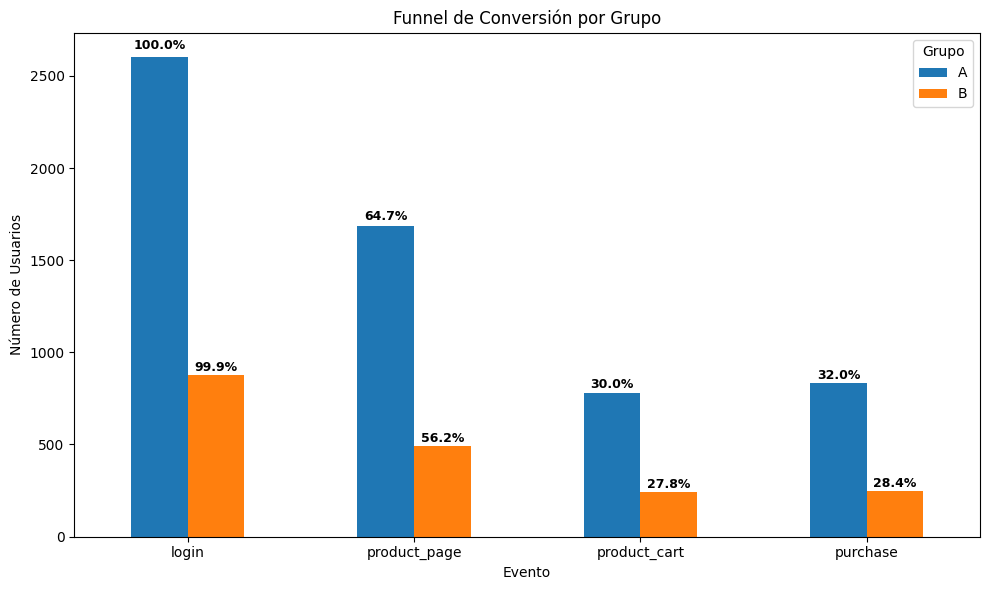

In [15]:
# Visualizar el embudo (funnel chart)
ax = funnel_with_total.pivot(index='event_name', columns='group', values='user_count').plot(kind='bar', figsize=(10, 6))

# Agregar etiquetas de porcentaje manualmente para barras NO apiladas
for i, container in enumerate(ax.containers):
    # Obtener el grupo para este contenedor
    group = container.get_label()
    # Filtrar el DataFrame para este grupo
    group_data = funnel_with_total[funnel_with_total['group'] == group]
    # Obtener los porcentajes en el orden correcto
    percentages = group_data.set_index('event_name').loc[funnel_steps, 'porcentaje'].tolist()
    
    # Agregar texto manualmente para cada barra
    for j, (bar, percentage) in enumerate(zip(container, percentages)):
        if percentage > 0:
            height = bar.get_height()
            # Posicionar la etiqueta en el centro de cada barra individual
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{percentage:.1f}%', 
                   ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Funnel de Conversión por Grupo')
plt.xlabel('Evento')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

Obervamos que hay más usuarios en el grupo A, así como mayor porcentaje de usuarios que pasan de un evento a otro, a pesar de que vemos una caída de product_page a product_cart en ambos grupos, en el grupo A, obtenemos un mayor porcentaje de usuarios que compran(33.7%).  Sin embargo, no hay una diferencia muy grande a simple vista.

In [16]:
#Confirmación de la ventana de 14 días
#Fusionar df_usuarios con df_eventos con user_id
df_usuarios_eventos = pd.merge(df_usuarios, df_eventos, on='user_id', how='left')
#Calcular el lifetime (días de antiguedad)
#Diferencia de Tiempo: Resta first_date de event_dt. El resultado es un objeto timedelta.

# Convert both columns to datetime objects
df_usuarios_eventos['first_date'] = pd.to_datetime(df_usuarios_eventos['first_date'])
df_usuarios_eventos['event_dt'] = pd.to_datetime(df_usuarios_eventos['event_dt'])


df_usuarios_eventos['lifetime'] = df_usuarios_eventos['event_dt'] - df_usuarios_eventos['first_date']
#Conversión a Días: Convierte el timedelta a un número entero de días.
df_usuarios_eventos['lifetime'] = df_usuarios_eventos['lifetime'].dt.days
print(df_usuarios_eventos.head())

            user_id first_date     region   device            event_dt  \
0  D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:10   
1  D72A72121175D8BE 2020-12-07         EU       PC 2020-12-07 21:52:07   
2  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-07 16:38:09   
3  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-08 02:02:34   
4  F1C668619DFE6E65 2020-12-07  N.America  Android 2020-12-23 14:35:41   

     event_name  details  lifetime  
0  product_page      NaN         0  
1         login      NaN         0  
2  product_page      NaN         0  
3  product_page      NaN         1  
4  product_page      NaN        16  


In [17]:
#Aplicar el filtro de 14 días (filtro de la ventana de conversión)
df_usuarios_eventos_filtrado = df_usuarios_eventos[df_usuarios_eventos['lifetime'] <= 14]

# Merge with participants data to get the group information
df_funnel_events = pd.merge(df_usuarios_eventos_filtrado, df_participantes[['user_id', 'group']], on='user_id', how='left')

#Realizar embudo de conversión con usuarios filtrados
df_funnel_events = df_funnel_events[df_funnel_events['event_name'].isin(funnel_steps)]
df_funnel = df_funnel_events.sort_values(by=['user_id', 'event_dt']).drop_duplicates(subset=['user_id', 'event_name', 'group'])
funnel_counts = df_funnel.groupby(['group', 'event_name']).agg(user_count=('user_id', 'nunique')).reset_index()
funnel_counts['event_name'] = pd.Categorical(funnel_counts['event_name'], categories=funnel_steps, ordered=True)
funnel_counts = funnel_counts.sort_values(by=['group', 'event_name'])
funnel_with_total = pd.merge(funnel_counts, total_users_per_group, on='group', how='left')
funnel_with_total['conversion_from_start'] = funnel_with_total['user_count'] / funnel_with_total.loc[funnel_with_total['event_name'] == 'login', 'user_count'].iloc[0] * 100
funnel_with_total['step_conversion'] = funnel_with_total.groupby('group')['user_count'].pct_change().fillna(funnel_with_total['conversion_from_start'] / 100).apply(lambda x: x * 100)
funnel_with_total['porcentaje'] = funnel_with_total['user_count'] * 100 / funnel_with_total['total_users']
print(funnel_with_total)

  group    event_name  user_count  total_users  conversion_from_start  \
0     A         login        2747         2604             100.000000   
1     A  product_page        1780         2604              64.797961   
2     A  product_cart         824         2604              29.996360   
3     A      purchase         872         2604              31.743720   
4     B         login         927          877              33.745905   
5     B  product_page         523          877              19.038952   
6     B  product_cart         255          877               9.282854   
7     B      purchase         256          877               9.319257   

   step_conversion  porcentaje  
0       100.000000  105.491551  
1       -35.202039   68.356375  
2       -53.707865   31.643625  
3         5.825243   33.486943  
4        33.745905  105.701254  
5       -43.581446   59.635120  
6       -51.242830   29.076397  
7         0.392157   29.190422  


In [18]:
#Verificar la distribución de número de eventos por usuario: agrupar user_id por event_name.nunique
df_eventos_por_usuario = df_eventos.groupby('user_id')['event_name'].nunique().reset_index(name='num_eventos')
print(df_eventos_por_usuario)


                user_id  num_eventos
0      0001710F4DDB1D1B            3
1      000199F1887AE5E6            4
2      0002499E372175C7            3
3      0002CE61FF2C4011            3
4      000456437D0EFFE1            2
...                 ...          ...
58698  FFF7A7BAF44FE9B4            1
58699  FFF8FDBE2FE99C91            3
58700  FFF91B6C5431F375            2
58701  FFFAB034A09DCC28            2
58702  FFFFE36C0F6E92DF            3

[58703 rows x 2 columns]


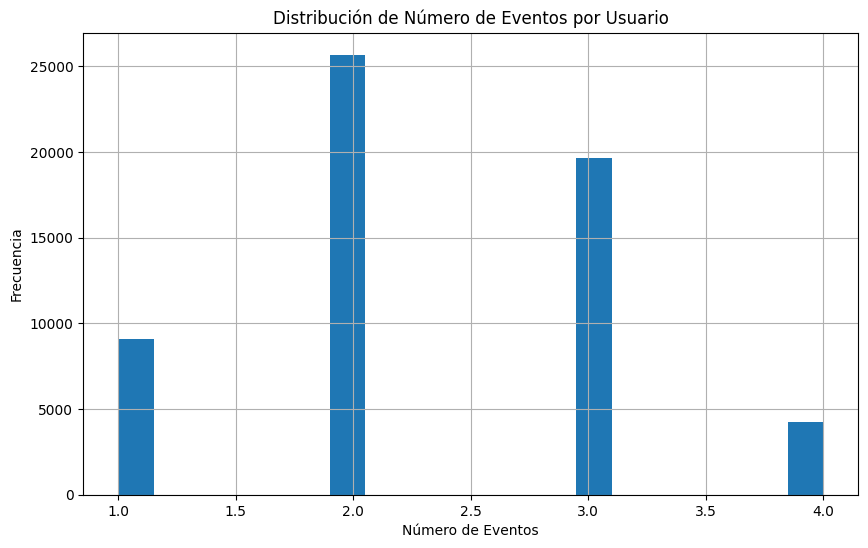

In [19]:
#Visualizar la distribución de número de eventos por usuario: histograma (encontrar usuarios muy activos, valores atípicos)
df_eventos_por_usuario.hist(bins=20, figsize=(10, 6))
plt.title('Distribución de Número de Eventos por Usuario')
plt.xlabel('Número de Eventos')
plt.ylabel('Frecuencia')
plt.show()


No hay valores atípicos que puedan sesgar

     group           user_id  num_eventos
0        A  0010A1C096941592            3
1        A  00341D8401F0F665            1
2        A  003DF44D7589BBD4            3
3        A  00505E15A9D81546            1
4        A  006E3E4E232CE760            2
...    ...               ...          ...
3670     B  FE76759FE6BF8C68            4
3671     B  FE8F9858BBE502D9            2
3672     B  FEA0C585A53E7027            3
3673     B  FF8CF7057415EB29            2
3674     B  FFF28D02B1EACBE1            3

[3675 rows x 3 columns]


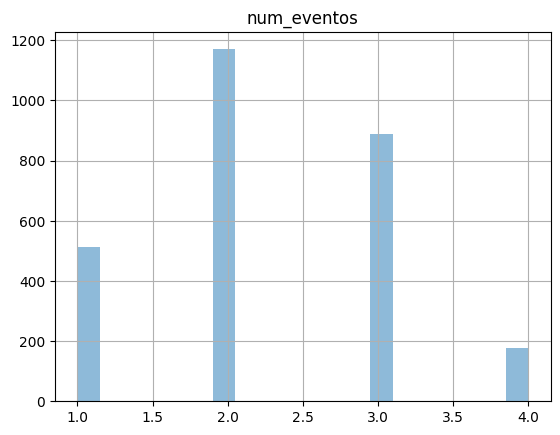

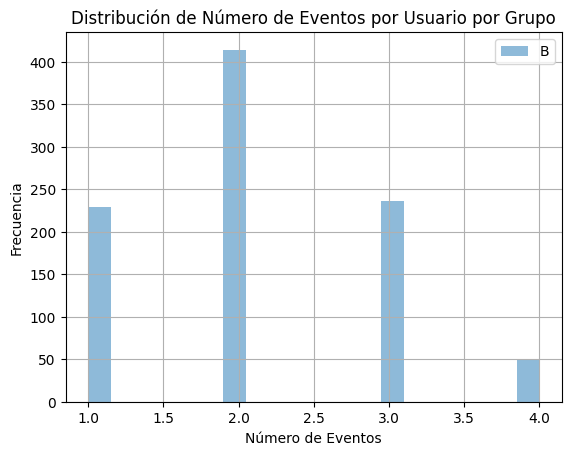

In [20]:
#Visualizar número de eventos por usuario, por grupo A/B
#merge con df_eventos y df_participantes por user_id
df_eventos_por_usuario_por_grupo = pd.merge(df_eventos_por_usuario, df_participantes, on='user_id', how='left')
#agrupar por group, por usuario y contar número de eventos para cada usuario
df_eventos_por_usuario_por_grupo = df_eventos_por_usuario_por_grupo.groupby(['group', 'user_id'])['num_eventos'].sum().reset_index()
print(df_eventos_por_usuario_por_grupo)
#Hacer histograma para cada grupo
df_eventos_por_usuario_por_grupo[df_eventos_por_usuario_por_grupo['group'] == 'A'].hist(bins=20, alpha=0.5, label='A')
df_eventos_por_usuario_por_grupo[df_eventos_por_usuario_por_grupo['group'] == 'B'].hist(bins=20, alpha=0.5, label='B')
plt.title('Distribución de Número de Eventos por Usuario por Grupo')
plt.xlabel('Número de Eventos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Vemos ligeras variaciones entre las distribuciones de cada grupo, sin embargo en ningún grupo encontramos valores atípicos, ninguno varía de más de 4 eventos por usuario. Asímismo, en ambos grupos observamos que la mayoría de usuarios realizan 2 eventos.

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con los calculos y las visualizaciones para ver la conversión 

### Validación de la Prueba y Distribución Temporal

In [21]:
#Observar si el número de usuarios está distribuido equitativamente
#Número total de usuarios para cada prueba
total_usuarios_por_prueba = df_datos_clave.groupby('group')['user_id'].nunique().reset_index()
total_usuarios_por_prueba.columns = ['group', 'total_users']

# Calcular el total de usuarios en ambos grupos
total_general_usuarios = total_usuarios_por_prueba['total_users'].sum()

# Calcular el porcentaje de usuarios en cada grupo
total_usuarios_por_prueba['percentage'] = (total_usuarios_por_prueba['total_users'] / total_general_usuarios) * 100

# Calcular la diferencia porcentual entre los grupos
if len(total_usuarios_por_prueba) == 2:
    diff_percentage = abs(total_usuarios_por_prueba.loc[total_usuarios_por_prueba['group'] == 'A', 'percentage'].iloc[0] -
                          total_usuarios_por_prueba.loc[total_usuarios_por_prueba['group'] == 'B', 'percentage'].iloc[0])
    print(f"Diferencia porcentual entre grupos A y B: {diff_percentage:.2f}%")
    if diff_percentage <= 1:
        print("La diferencia en el número de usuarios entre los grupos A y B es menor o igual al 1%.")
    else:
        print("La diferencia en el número de usuarios entre los grupos A y B es mayor al 1%.")
else:
    print("No hay exactamente dos grupos (A y B) para comparar.")

#Comparar el número de usuarios únicos
print(total_usuarios_por_prueba)

Diferencia porcentual entre grupos A y B: 49.61%
La diferencia en el número de usuarios entre los grupos A y B es mayor al 1%.
  group  total_users  percentage
0     A         2604    74.80609
1     B          877    25.19391


La diferencia es muy grande por lo que compromete severamente la fiabilidad de cualquier resultado estadístico que obtengamos. Además, no se cumplieron los 6000 usuarios que tenían previstos para la muestra

In [22]:
#Observar distribución de eventos por día: df_eventos, event_dt(fecha), event_name(evento)
df_eventos['event_dt'] = pd.to_datetime(df_eventos['event_dt'])
df_eventos['event_dt'] = df_eventos['event_dt'].dt.date
df_eventos_por_dia = df_eventos.groupby('event_dt')['event_name'].count().reset_index(name='num_eventos')
df_eventos_por_dia['event_dt'] = pd.to_datetime(df_eventos_por_dia['event_dt'])
df_eventos_por_dia = df_eventos_por_dia.sort_values(by='event_dt')
print(df_eventos_por_dia)

     event_dt  num_eventos
0  2020-12-07        11385
1  2020-12-08        12547
2  2020-12-09        12122
3  2020-12-10        14077
4  2020-12-11        13864
5  2020-12-12        17634
6  2020-12-13        20985
7  2020-12-14        26184
8  2020-12-15        23469
9  2020-12-16        20909
10 2020-12-17        21751
11 2020-12-18        22871
12 2020-12-19        24273
13 2020-12-20        26425
14 2020-12-21        32559
15 2020-12-22        29472
16 2020-12-23        26108
17 2020-12-24        19399
18 2020-12-26        14058
19 2020-12-27        12420
20 2020-12-28        11014
21 2020-12-29        10146
22 2020-12-30           89


Text(0.5, 0, 'Fecha')

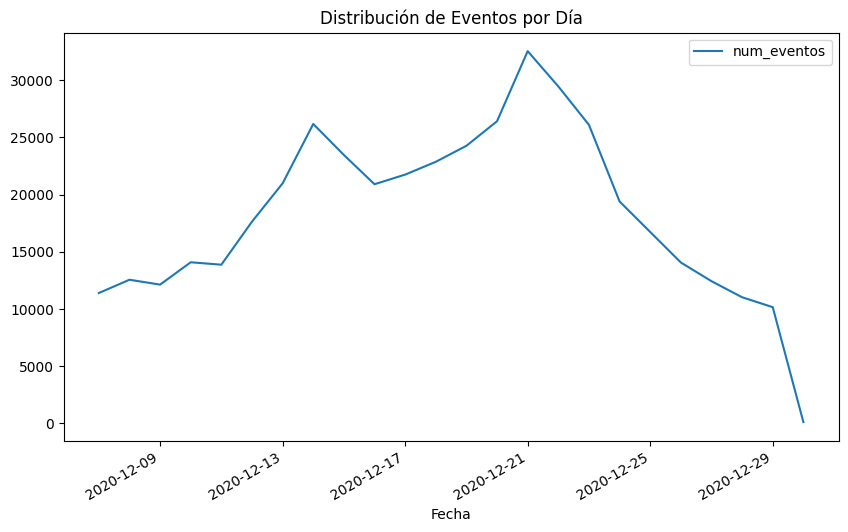

In [23]:
#Visualizar distribución de eventos por día
df_eventos_por_dia.plot(x='event_dt', y='num_eventos', kind='line', figsize=(10, 6))
plt.title('Distribución de Eventos por Día')
plt.xlabel('Fecha')

Observamos algunos picos, de días en los que hubo una mayor actividad, como el 14 y el 21. Asimismo podemos visualizar una caída a partir del 21, la cual no se recupera.

### Verificación de extras Pre-Prueba

In [24]:
#Verificar el calendario de eventos de marketing: si algún evento de marketing coincide con la fecha de la prueba(2020-12-07- 2021-01-01)
#Filtrar df_calendario con los eventos 2020-12-07- 2021-01-01
df_calendario_prueba = df_calendario[(df_calendario['start_dt'] >= '2020-12-07') & (df_calendario['finish_dt'] <= '2021-01-01')]
print(df_calendario_prueba)
print(df_calendario['start_dt'].describe)
print(df_calendario['finish_dt'].describe)

Empty DataFrame
Columns: [name, regions, start_dt, finish_dt]
Index: []
<bound method NDFrame.describe of 0    2020-12-25
1    2020-02-14
2    2020-03-17
3    2020-04-12
4    2020-07-04
5    2020-11-26
6    2020-01-25
7    2020-05-01
8    2020-03-08
9    2020-05-09
10   2020-12-30
11   2020-06-25
12   2020-11-11
13   2020-10-01
Name: start_dt, dtype: datetime64[ns]>
<bound method NDFrame.describe of 0    2021-01-03
1    2020-02-16
2    2020-03-19
3    2020-04-19
4    2020-07-11
5    2020-12-01
6    2020-02-07
7    2020-05-03
8    2020-03-10
9    2020-05-11
10   2021-01-07
11   2020-07-01
12   2020-11-12
13   2020-10-07
Name: finish_dt, dtype: datetime64[ns]>


Confirmamos que ningún evento de marketing coincide con las fechas de las pruebas

## Prueba A/B

### Preparar datos para Z-test

In [25]:
from statsmodels.stats.proportion import proportions_ztest

# Prepare data for Z-tests for each funnel step
funnel_steps_to_test = ['product_page', 'product_cart', 'purchase']
z_test_results = {}

for step in funnel_steps_to_test:
    # Get the number of users who reached the current step for each group
    successes_a = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == step)]['user_count'].iloc[0]
    successes_b = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == step)]['user_count'].iloc[0]

    # Get the total number of users in each group who started the funnel (login)
    # Using login users as the total number of trials for conversion from the start
    nobs_a = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'login')]['user_count'].iloc[0]
    nobs_b = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'login')]['user_count'].iloc[0]

    # Perform the Z-test for proportions
    # The alternative hypothesis is 'two-sided' by default, which is appropriate here.
    z_stat, p_value = proportions_ztest([successes_a, successes_b], [nobs_a, nobs_b])

    z_test_results[step] = {'p_value': p_value, 'z_statistic': z_stat}

# Display the results
for step, result in z_test_results.items():
    print(f"Z-test for '{step}':")
    print(f"  Z-statistic: {result['z_statistic']:.4f}")
    print(f"  P-value: {result['p_value']:.4f}")
    alpha = 0.05
    if result['p_value'] < alpha:
        print(f"  Result: Reject the null hypothesis (There is a significant difference in conversion rates for '{step}' between groups A and B)")
    else:
        print(f"  Result: Fail to reject the null hypothesis (There is no significant difference in conversion rates for '{step}' between groups A and B)")
    print("-" * 30)

Z-test for 'product_page':
  Z-statistic: 4.5613
  P-value: 0.0000
  Result: Reject the null hypothesis (There is a significant difference in conversion rates for 'product_page' between groups A and B)
------------------------------
Z-test for 'product_cart':
  Z-statistic: 1.4383
  P-value: 0.1503
  Result: Fail to reject the null hypothesis (There is no significant difference in conversion rates for 'product_cart' between groups A and B)
------------------------------
Z-test for 'purchase':
  Z-statistic: 2.3560
  P-value: 0.0185
  Result: Reject the null hypothesis (There is a significant difference in conversion rates for 'purchase' between groups A and B)
------------------------------


<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el calculo de la z-score y con el desarrollo de la prueba de hipótesis.


Unicamente encontramos significancia estadística en la tasa de conversión de product_page y purchase.

### Analizar los resultados

Interpretar valores P del Z-test, y la conversión de porcentaje del EDA para determinar una significancia estadística.

In [26]:
# Alpha level for significance
alpha = 0.05

# Interpret results for product_page
p_value_product_page = z_test_results['product_page']['p_value']
conversion_a_product_page = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'product_page')]['porcentaje'].iloc[0]
conversion_b_product_page = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'product_page')]['porcentaje'].iloc[0]

print("Interpretation for 'product_page':")
if p_value_product_page < alpha:
    print(f"  The p-value ({p_value_product_page:.4f}) is less than the alpha level ({alpha}).")
    print("  We reject the null hypothesis. There is a statistically significant difference in conversion rates to 'product_page' between groups A and B.")
    if conversion_a_product_page > conversion_b_product_page:
        print(f"  Conversion rate in Group A ({conversion_a_product_page:.2f}%) is higher than in Group B ({conversion_b_product_page:.2f}%).")
    else:
        print(f"  Conversion rate in Group B ({conversion_b_product_page:.2f}%) is higher than in Group A ({conversion_a_product_page:.2f}%).")
else:
    print(f"  The p-value ({p_value_product_page:.4f}) is greater than or equal to the alpha level ({alpha}).")
    print("  We fail to reject the null hypothesis. There is no statistically significant difference in conversion rates to 'product_page' between groups A and B.")
print("-" * 30)

# Interpret results for product_cart
p_value_product_cart = z_test_results['product_cart']['p_value']
conversion_a_product_cart = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'product_cart')]['porcentaje'].iloc[0]
conversion_b_product_cart = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'product_cart')]['porcentaje'].iloc[0]

print("Interpretation for 'product_cart':")
if p_value_product_cart < alpha:
    print(f"  The p-value ({p_value_product_cart:.4f}) is less than the alpha level ({alpha}).")
    print("  We reject the null hypothesis. There is a statistically significant difference in conversion rates to 'product_cart' between groups A and B.")
    if conversion_a_product_cart > conversion_b_product_cart:
        print(f"  Conversion rate in Group A ({conversion_a_product_cart:.2f}%) is higher than in Group B ({conversion_b_product_cart:.2f}%).")
    else:
        print(f"  Conversion rate in Group B ({conversion_b_product_cart:.2f}%) is higher than in Group A ({conversion_a_product_cart:.2f}%).")
else:
    print(f"  The p-value ({p_value_product_cart:.4f}) is greater than or equal to the alpha level ({alpha}).")
    print("  We fail to reject the null hypothesis. There is no statistically significant difference in conversion rates to 'product_cart' between groups A and B.")
print("-" * 30)

# Interpret results for purchase
p_value_purchase = z_test_results['purchase']['p_value']
conversion_a_purchase = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'purchase')]['porcentaje'].iloc[0]
conversion_b_purchase = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'purchase')]['porcentaje'].iloc[0]

print("Interpretation for 'purchase':")
if p_value_purchase < alpha:
    print(f"  The p-value ({p_value_purchase:.4f}) is less than the alpha level ({alpha}).")
    print("  We reject the null hypothesis. There is a statistically significant difference in conversion rates to 'purchase' between groups A and B.")
    if conversion_a_purchase > conversion_b_purchase:
        print(f"  Conversion rate in Group A ({conversion_a_purchase:.2f}%) is higher than in Group B ({conversion_b_purchase:.2f}%).")
    else:
        print(f"  Conversion rate in Group B ({conversion_b_purchase:.2f}%) is higher than in Group A ({conversion_a_purchase:.2f}%).")
else:
    print(f"  The p-value ({p_value_purchase:.4f}) is greater than or equal to the alpha level ({alpha}).")
    print("  We fail to reject the null hypothesis. There is no statistically significant difference in conversion rates to 'purchase' between groups A and B.")
print("-" * 30)

Interpretation for 'product_page':
  The p-value (0.0000) is less than the alpha level (0.05).
  We reject the null hypothesis. There is a statistically significant difference in conversion rates to 'product_page' between groups A and B.
  Conversion rate in Group A (68.36%) is higher than in Group B (59.64%).
------------------------------
Interpretation for 'product_cart':
  The p-value (0.1503) is greater than or equal to the alpha level (0.05).
  We fail to reject the null hypothesis. There is no statistically significant difference in conversion rates to 'product_cart' between groups A and B.
------------------------------
Interpretation for 'purchase':
  The p-value (0.0185) is less than the alpha level (0.05).
  We reject the null hypothesis. There is a statistically significant difference in conversion rates to 'purchase' between groups A and B.
  Conversion rate in Group A (33.49%) is higher than in Group B (29.19%).
------------------------------


Conclusión: el grupo A tiene mayores tasas de conversión, sobre todo en 'purchase' y 'product_page'

## CONCLUSIONES FINALES

### Conclusión EDA

 A pesar de que el comportamiento de los usuarios es normal, la prueba A/B en sí misma es fundamentalmente defectuosa y de alto riesgo.
 1. Fallas Técnicas Críticas (Compromiso de la Prueba)
 * Desequilibrio Extremo en el Tamaño de la Muestra: El error de asignación ($75\%/25\%$ de usuarios) es la falla más grave. Esto invalida la prueba como un experimento de control riguroso, ya que el poder estadístico para el Grupo B es muy bajo. El resultado de cualquier prueba de significancia debe interpretarse con extrema cautela.
 * Volumen Insuficiente de Participantes: El total de $3,675$ usuarios es significativamente menor al previsto ($6,000$). Esto, sumado al desequilibrio, reduce la probabilidad de detectar el efecto deseado del $10\%$ (bajo poder estadístico).
 2. Tendencias de Comportamiento y Contexto
 * Embudo: El Grupo A (Control) tiene una conversión final superior ($\approx 33.7\%$) y mejores tasas de paso a paso. La diferencia no es "grande a simple vista", pero el objetivo del nuevo sistema era un aumento del $10\%$, lo que requiere verificación estadística.
 * Distribución de Eventos: La baja variación de eventos por usuario (máximo 4) y la ausencia de valores atípicos es una buena noticia: indica que no hay bots o super-usuarios sesgando las métricas de forma individual.
 * Análisis Temporal: La caída significativa de actividad a partir del 21 de diciembre coincide exactamente con la fecha en que se dejó de aceptar nuevos usuarios.
 * Contexto Externo: La ausencia de eventos de marketing que coincidan con la prueba es favorable, ya que elimina una fuente potencial de contaminación externa o sesgo temporal.

### Conclusión Prueba A/B

In [27]:
# Summarize the findings from the statistical tests and conversion rates
print("Summary of A/B Test Results (recommender_system_test):")
print("-" * 40)

# Expected outcome: at least a 10% increase in conversion at each stage
expected_increase = 0.10

# Analyze product_page conversion
p_value_product_page = z_test_results['product_page']['p_value']
conversion_a_product_page = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'product_page')]['porcentaje'].iloc[0]
conversion_b_product_page = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'product_page')]['porcentaje'].iloc[0]

print("Product Page Conversion:")
print(f"  Group A Conversion: {conversion_a_product_page:.2f}%")
print(f"  Group B Conversion: {conversion_b_product_page:.2f}%")
print(f"  P-value: {p_value_product_page:.4f}")
if p_value_product_page < alpha:
    print("  Result: Statistically significant difference.")
    if conversion_b_product_page > conversion_a_product_page:
        print("  Group B had a higher conversion rate.")
        observed_increase_product_page = (conversion_b_product_page - conversion_a_product_page) / conversion_a_product_page
        print(f"  Observed Increase (Group B vs A): {observed_increase_product_page:.2%}")
        if observed_increase_product_page >= expected_increase:
            print(f"  Meets expected outcome of at least {expected_increase:.0%} increase.")
        else:
            print(f"  Does NOT meet expected outcome of at least {expected_increase:.0%} increase.")
    else:
        print("  Group A had a higher conversion rate.")
else:
    print("  Result: No statistically significant difference.")
print("-" * 30)

# Analyze product_cart conversion
p_value_product_cart = z_test_results['product_cart']['p_value']
conversion_a_product_cart = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'product_cart')]['porcentaje'].iloc[0]
conversion_b_product_cart = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'product_cart')]['porcentaje'].iloc[0]

print("Product Cart Conversion:")
print(f"  Group A Conversion: {conversion_a_product_cart:.2f}%")
print(f"  Group B Conversion: {conversion_b_product_cart:.2f}%")
print(f"  P-value: {p_value_product_cart:.4f}")
if p_value_product_cart < alpha:
     print("  Result: Statistically significant difference.")
     if conversion_b_product_cart > conversion_a_product_cart:
        print("  Group B had a higher conversion rate.")
        observed_increase_product_cart = (conversion_b_product_cart - conversion_a_product_cart) / conversion_a_product_cart
        print(f"  Observed Increase (Group B vs A): {observed_increase_product_cart:.2%}")
        if observed_increase_product_cart >= expected_increase:
            print(f"  Meets expected outcome of at least {expected_increase:.0%} increase.")
        else:
            print(f"  Does NOT meet expected outcome of at least {expected_increase:.0%} increase.")
     else:
        print("  Group A had a higher conversion rate.")
else:
    print("  Result: No statistically significant difference.")
print("-" * 30)

# Analyze purchase conversion
p_value_purchase = z_test_results['purchase']['p_value']
conversion_a_purchase = funnel_with_total[(funnel_with_total['group'] == 'A') & (funnel_with_total['event_name'] == 'purchase')]['porcentaje'].iloc[0]
conversion_b_purchase = funnel_with_total[(funnel_with_total['group'] == 'B') & (funnel_with_total['event_name'] == 'purchase')]['porcentaje'].iloc[0]

print("Purchase Conversion:")
print(f"  Group A Conversion: {conversion_a_purchase:.2f}%")
print(f"  Group B Conversion: {conversion_b_purchase:.2f}%")
print(f"  P-value: {p_value_purchase:.4f}")
if p_value_purchase < alpha:
    print("  Result: Statistically significant difference.")
    if conversion_b_purchase > conversion_a_purchase:
        print("  Group B had a higher conversion rate.")
        observed_increase_purchase = (conversion_b_purchase - conversion_a_purchase) / conversion_a_purchase
        print(f"  Observed Increase (Group B vs A): {observed_increase_purchase:.2%}")
        if observed_increase_purchase >= expected_increase:
            print(f"  Meets expected outcome of at least {expected_increase:.0%} increase.")
        else:
            print(f"  Does NOT meet expected outcome of at least {expected_increase:.0%} increase.")
    else:
        print("  Group A had a higher conversion rate.")
else:
    print("  Result: No statistically significant difference.")
print("-" * 30)

Summary of A/B Test Results (recommender_system_test):
----------------------------------------
Product Page Conversion:
  Group A Conversion: 68.36%
  Group B Conversion: 59.64%
  P-value: 0.0000
  Result: Statistically significant difference.
  Group A had a higher conversion rate.
------------------------------
Product Cart Conversion:
  Group A Conversion: 31.64%
  Group B Conversion: 29.08%
  P-value: 0.1503
  Result: No statistically significant difference.
------------------------------
Purchase Conversion:
  Group A Conversion: 33.49%
  Group B Conversion: 29.19%
  P-value: 0.0185
  Result: Statistically significant difference.
  Group A had a higher conversion rate.
------------------------------


Con base en las pruebas estadísticas y las tasas de conversión observadas:

* El nuevo embudo de pago (Grupo B) NO mostró una mejora estadísticamente significativa de al menos el 10% en la conversión en ninguna etapa del embudo, en comparación con el grupo de control (Grupo A).

* De hecho, el Grupo A tuvo tasas de conversión estadísticamente significativamente MÁS ALTAS para los eventos de 'product_page' (página de producto) y 'purchase' (compra).

Consideraciones Importantes:

* La prueba presentó un desequilibrio significativo en el número de participantes entre los grupos A y B, lo que afecta la fiabilidad de los resultados.

* El número real de participantes fue considerablemente menor que los 6,000 planificados, lo que impacta aún más el poder estadístico de la prueba.

* A pesar de estos problemas, las pruebas estadísticas indicaron que el Grupo A tuvo un rendimiento igual o superior al Grupo B en términos de conversión.

* No se recomienda implementar los cambios sugeridos por el nuevo sistema de recomendaciones mejorado. O realizar de nuevo la prueba con un número mayor de usuarios en ambos grupos. 